In [8]:
import pandas as pd
import numpy as np
import os, time, random

#### Identify Directories

In [9]:
currDir = os.getcwd()
rootDir = os.path.abspath(os.path.join(currDir,'..'))

dataDir = os.path.abspath(os.path.join(rootDir,'data'))
rawDataDir = os.path.abspath(os.path.join(dataDir,'raw'))
interimDataDir = os.path.abspath(os.path.join(dataDir,'interim'))
finalDataDir = os.path.abspath(os.path.join(dataDir,'final'))

#### Reverse Geocoding

In [39]:
import reverse_geocoder as geo

In [40]:
states = ['Western Australia','South Australia','New South Wales',
          'Tasmania','Northern Territory','Queensland','Victoria']

In [58]:
t0 = time.time()

N = 1000
result_list = []

for num in range(N):
    
    # generate random lats + longs (must be inside Australia bounding box)
    lat = random.randint(-43,-10) + random.randint(0,100)/100
    long = random.randint(113,153) + random.randint(0,100)/100
    
    coords = lat, long
    result = geo.search(coords)[0]
    
    row = (lat,long,result['lat'],result['lon'],result['name'],result['admin1'],result['admin2'],result['cc'])
    result_list.append(row)
    #print(result)

    if (num+1) % 100 == 0:
    print(num+1)
    
t1 = time.time()

    
cols = ['gps_lat','gps_long','lat','long','city','state','area','country']
df['state_flag'] = [row if row in states else 'None' for row in df['state'].values ]

df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

df = pd.DataFrame(result_list,columns=cols)

In [59]:
# no. of minutes
(((t1 - t0)/60)/100)*1000

239.59822388490042

In [69]:
df['state_flag'].value_counts()

Western Australia     330
South Australia       170
Queensland            140
Northern Territory    113
None                  110
New South Wales        92
Victoria               25
Tasmania               20
Name: state_flag, dtype: int64

In [77]:
CSVs = [file for file in os.listdir(rawDataDir) if ('.csv' and 'geocode') in file]
CSVs.sort()

prev_filename = f"{rawDataDir}/reverse_geocode_results_pull{len(CSVs)}.csv"
try:
    prev_df = pd.read_csv(prev_filename)
    df = pd.concat([prev_df,df]).reset_index(drop=True)
except: pass

filename = f"{rawDataDir}/reverse_geocode_results_pull{len(CSVs)+1}.csv"
df.to_csv(filename,index=False)

print(df.shape)

(1000, 9)


#### Web Scraping Lat/Longitudes (w/ Selenium)

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib

# https://pythonprogramming.net/urllib-tutorial-python-3/
# https://www.linkedin.com/pulse/how-easy-scraping-data-from-linkedin-profiles-david-craven/

In [4]:
'''
driver_path = "/Users/Michael/chromedriver"
driver = webdriver.Chrome(driver_path)

soup.find("input",id="latitude")
soup.find("input",id="longitude")

Australia bounding box: ('Australia', (113.338953078, -43.6345972634, 153.569469029, -10.6681857235))
found here: https://gist.github.com/graydon/11198540

coordinates = [(-33.86,151.2),
               (113.338953078, -43.6345972634),
               (153.569469029, -10.6681857235)
               
              
              ]


'''

'\ndriver_path = "/Users/Michael/chromedriver"\ndriver = webdriver.Chrome(driver_path)\n\nsoup.find("input",id="latitude")\nsoup.find("input",id="longitude")\n\nAustralia bounding box: (\'Australia\', (113.338953078, -43.6345972634, 153.569469029, -10.6681857235))\nfound here: https://gist.github.com/graydon/11198540\n\ncoordinates = [(-33.86,151.2),\n               (113.338953078, -43.6345972634),\n               (153.569469029, -10.6681857235)\n               \n              \n              ]\n\n\n'

In [5]:

t0 = time.time()

# instantiate driver
#driver_path = "/Users/Michael/chromedriver"
driver_path = "C:\\Users\\MichaelMatosin\\chromedriver_win32\\chromedriver"
driver = webdriver.Chrome(driver_path)

# open chrome, go to URL
url = "https://www.latlong.net/Show-Latitude-Longitude.html"
driver.get(url)

# iterate through lat/long values, submit request, save location string result

N = 10000

try:
    location_list
except: 
    location_list = []

for num in range(N):
    
    # generate random lats + longs (must be inside Australia bounding box)
    lat = random.randint(-43,-10) + random.randint(0,100)/100
    long = random.randint(113,153) + random.randint(0,100)/100

    # find lat + long input elements
    input_lat = driver.find_element_by_id("latitude")
    input_long = driver.find_element_by_id("longitude")

    # clear input elements
    input_lat.clear()
    input_long.clear()
    
    # input a lat + long pair (must be in string format)
    input_lat.send_keys(str(lat))
    input_long.send_keys(str(long))

    # convert input lat + long to address
    convert = driver.find_element_by_class_name("button")
    convert.click()

    # record request output
    location = driver.find_element_by_class_name("bgw").text
    
    # if no address is found, record 'None'
    if len(location)==0:
        location = "None"
    
    # append lat + long + location to list
    location_list.append((lat,long,location))
    
    if (num+1) % 100 == 0:
        print(num+1)

# close browser
driver.close()

t1 = time.time()


ElementClickInterceptedException: Message: element click intercepted: Element <button title="Show Lat Long converted address on Map" class="button margin38">...</button> is not clickable at point (452, 468). Other element would receive the click: <p>...</p>
  (Session info: chrome=77.0.3865.120)


In [ ]:
len(location_list)

In [ ]:
mins = (t1-t0)/60

print("No of minutes:",mins)

# approv 38.5 seconds for 10 sets of coordinates
# approx 64 minutes per 1000 sets of coordinates

#### Extracting States from Location Strings

In [ ]:
states = ['Western Australia','South Australia','New South Wales',
          'Tasmania','Northern Territory','Queensland','Victoria']

In [ ]:

result = []
for lat,long,location in location_list:
    location = location.split('\n')[0]
    for state in states:
        if state.lower() in location.lower():
            res = (lat,long,state)
            break
        else:
            res = (lat,long,'None')

        
    result.append(res)
        
assert(len(location_list)==len(result))


In [ ]:
df = pd.DataFrame(result,columns=['Lat','Long','State'])
print(df.shape)

In [ ]:
CSVs = [file for file in os.listdir(rawDataDir) if '.csv' in file]
CSVs.sort()

prev_filename = f"{rawDataDir}/coordinates_and_states_pull{len(CSVs)}.csv"
prev_df = pd.read_csv(prev_filename)

df = pd.concat([prev_df,df]).reset_index(drop=True)

filename = f"{rawDataDir}/coordinates_and_states_pull{len(CSVs)+1}.csv"
df.to_csv(filename,index=False)

print(df.shape)

In [ ]:
df['State'].value_counts()

In [ ]:
df.head()

#### Plotting Data

In [46]:
import matplotlib.pyplot as plt

In [79]:
bounding_box = [(df['gps_long'].min(),df['gps_long'].max()),      
                (df['gps_lat'].min(), df['gps_lat'].max())]

In [80]:
'''
colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}
ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))
'''

"\ncolors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}\nax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))\n"

In [81]:
states

['Western Australia',
 'South Australia',
 'New South Wales',
 'Tasmania',
 'Northern Territory',
 'Queensland',
 'Victoria']

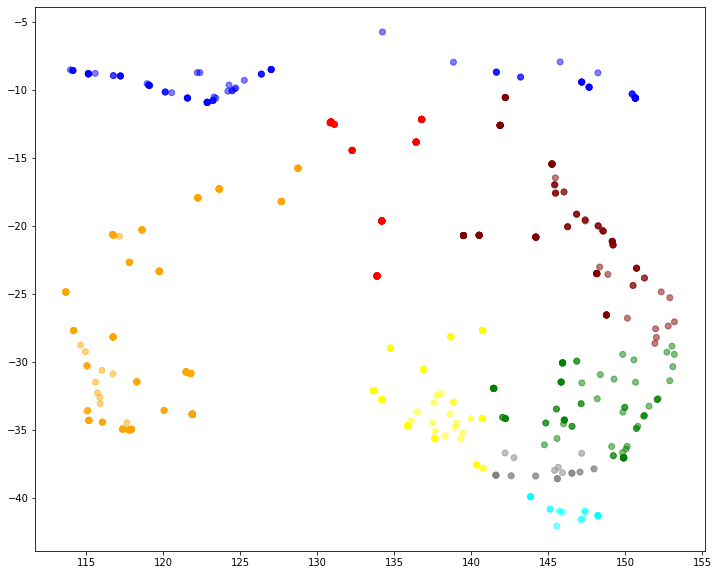

In [89]:
fig, ax = plt.subplots(figsize = (12,10))

color_dict = {'Western Australia':'orange',
              'South Australia':'yellow',
              'New South Wales':'green',
              'Tasmania':'cyan',
              'Northern Territory':'red',
              'Queensland':'maroon',
              'Victoria':'grey',
              'None':'blue'
}

plt.scatter(df['long'],df['lat']
            ,alpha=0.5
            ,c=df['state_flag'].apply(lambda x: color_dict[x]));

In [85]:
df.head()

,gps_lat,gps_long,lat,long,city,state,area,country,state_flag
0,-33.60,130.29,-32.1266,133.67271,Ceduna,South Australia,Ceduna,AU,South Australia
1,-13.56,148.00,-15.47028,145.24986,Cooktown,Queensland,Cook,AU,Queensland
2,-14.01,113.52,-8.8323,115.1247,Pecatu,Bali,,ID,None
3,-33.61,123.85,-33.86013,121.88259,Esperance,Western Australia,Esperance Shire,AU,Western Australia
4,-37.02,142.41,-37.05632,142.78088,Stawell,Victoria,Northern Grampians,AU,Victoria
